In [1]:
# https://www.datascience.com/blog/k-means-clustering
# scikit kmeans: http://scikit-learn.org/stable/modules/clustering.html#k-means

import h2o
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 21 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,13 days
H2O cluster name:,avkashchauhan
H2O cluster total nodes:,1
H2O cluster free memory:,6.571 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [68]:
hdf = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/ceder-rapids/data_1024.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
hdf.describe()

Rows:4000
Cols:3




,Driver_ID,Distance_Feature,Speeding_Feature
type,int,real,int
mins,3423310448.0,15.52,0.0
mean,3423312447.5,76.0415225,10.721
maxs,3423314447.0,244.79,100.0
sigma,1154.84486693,53.4695625748,13.7085425934
zeros,0,0,23
missing,0,0,0
0,3423311935.0,71.24,28.0
1,3423313212.0,52.53,25.0
2,3423313724.0,64.54,27.0


In [7]:
hdf = hdf[:,['Distance_Feature', 'Speeding_Feature']]

In [9]:
hdf

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25
41.91,10
58.64,20
52.02,8
31.25,34
44.31,19


In [10]:
type(hdf)

h2o.frame.H2OFrame

In [11]:
# Distance_Feature: mean distance driven per day
# Speeding_Feature: mean percentage of time a driver was >5 mph over the speed limit.
df = hdf.as_data_frame()

In [12]:
type(df)

pandas.core.frame.DataFrame

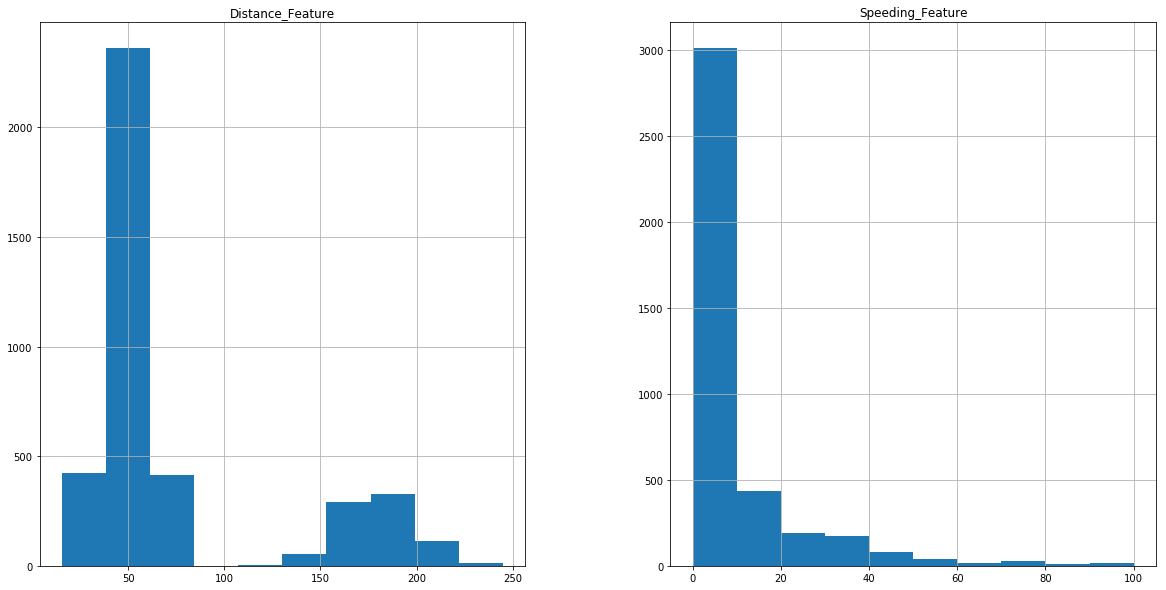

In [13]:
import pylab as pl
hdf.as_data_frame().hist(figsize=(20,10))
pl.show()

In [14]:
df.head(5)

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


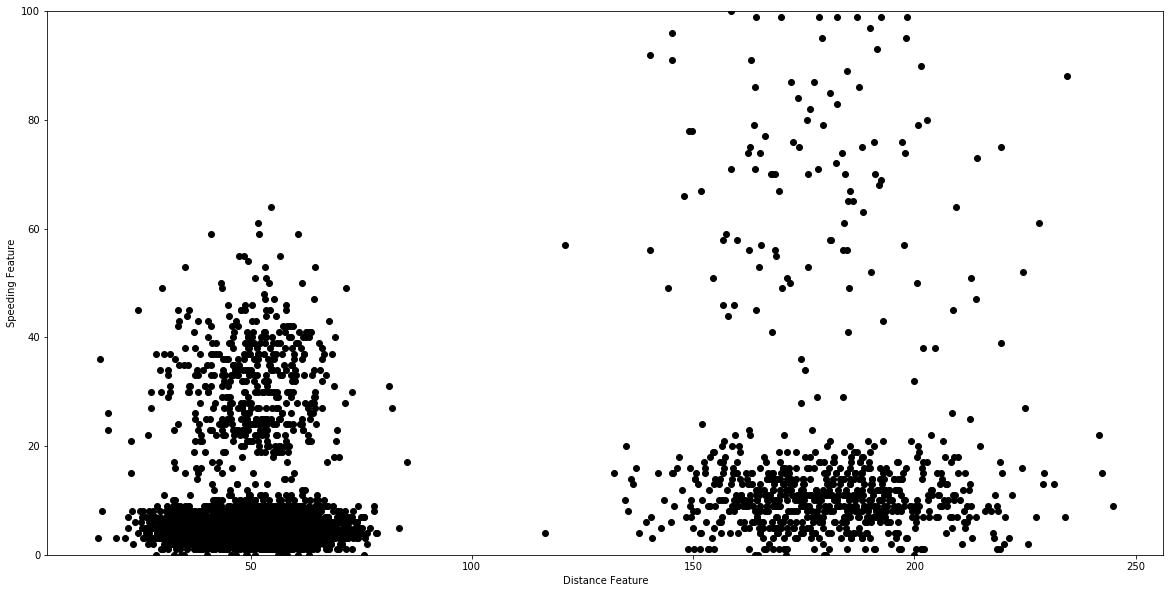

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df.Distance_Feature,df.Speeding_Feature,'ko')
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.ylim(0,100)
plt.show()

In [16]:
from sklearn.cluster import KMeans
import numpy as np

### For the purposes of this example, we store feature data from our dataframe `df`, in the `f1` and `f2` arrays. We combine this into a feature matrix `X` before entering it into the algorithm.
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)

In [17]:
df.shape

(4000, 2)

In [18]:
print(len(kmeans.labels_))
kmeans.labels_

4000


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [19]:
df_labels = pd.DataFrame(kmeans.labels_,columns=["labels"])

In [20]:
df['labels'] = df_labels['labels']

In [21]:
df.head(5)

,Distance_Feature,Speeding_Feature,labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [22]:
df.tail(5)

,Distance_Feature,Speeding_Feature,labels
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


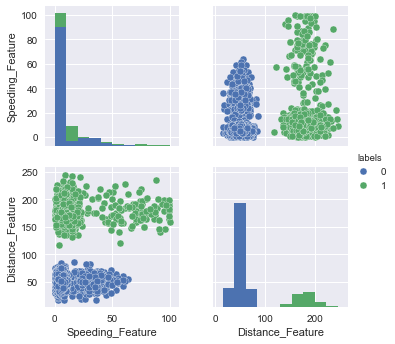

In [23]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df, vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

(50.047634375000001, 8.8287499999999994)
(180.01707500000001, 18.289999999999999)


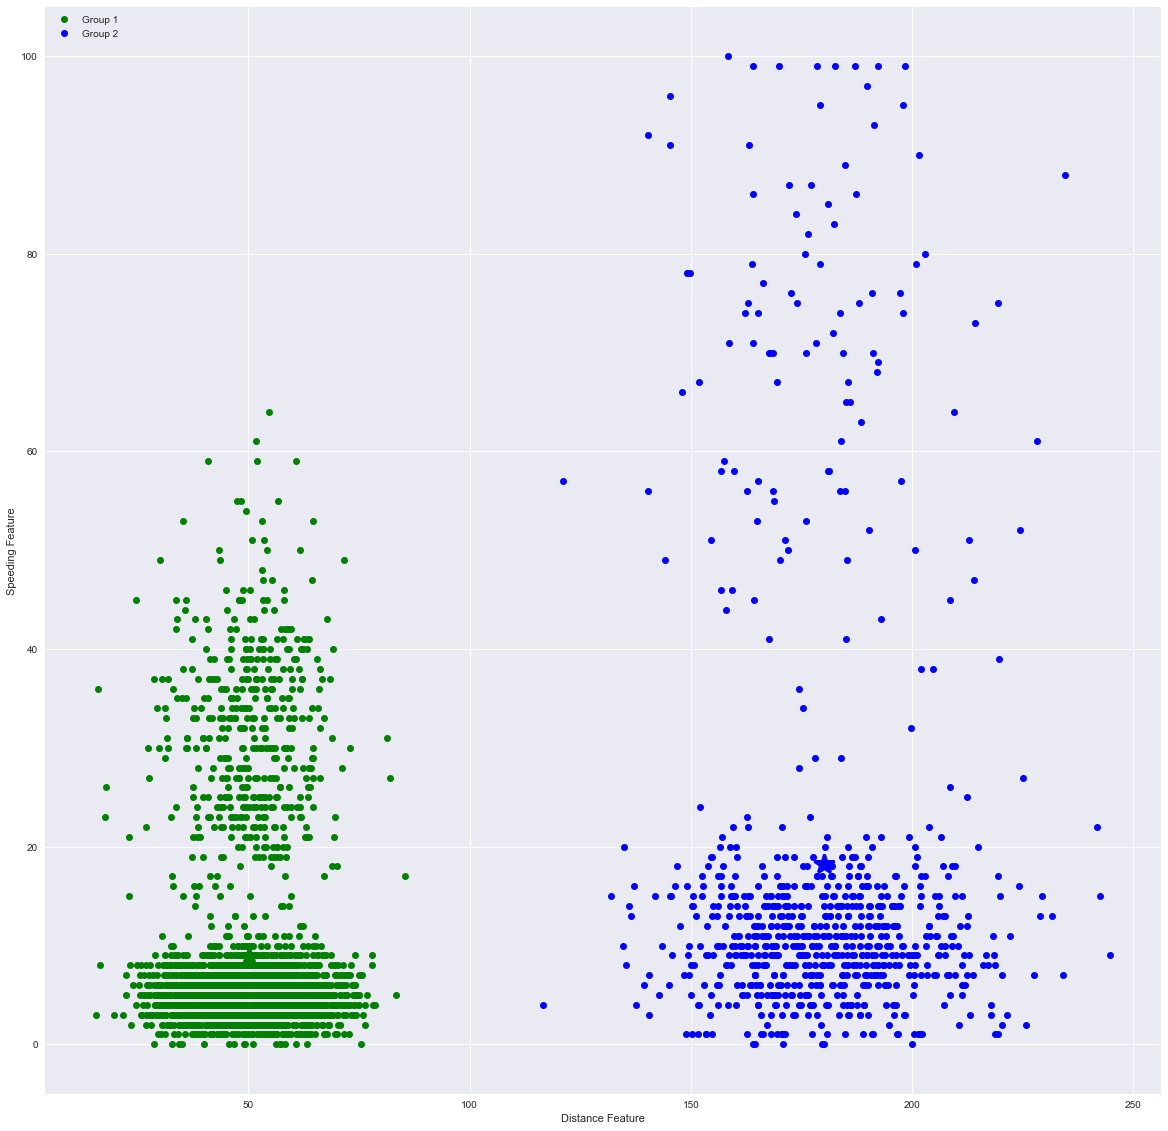

In [25]:
plt.figure(figsize=(20,20))

h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4).fit(X)

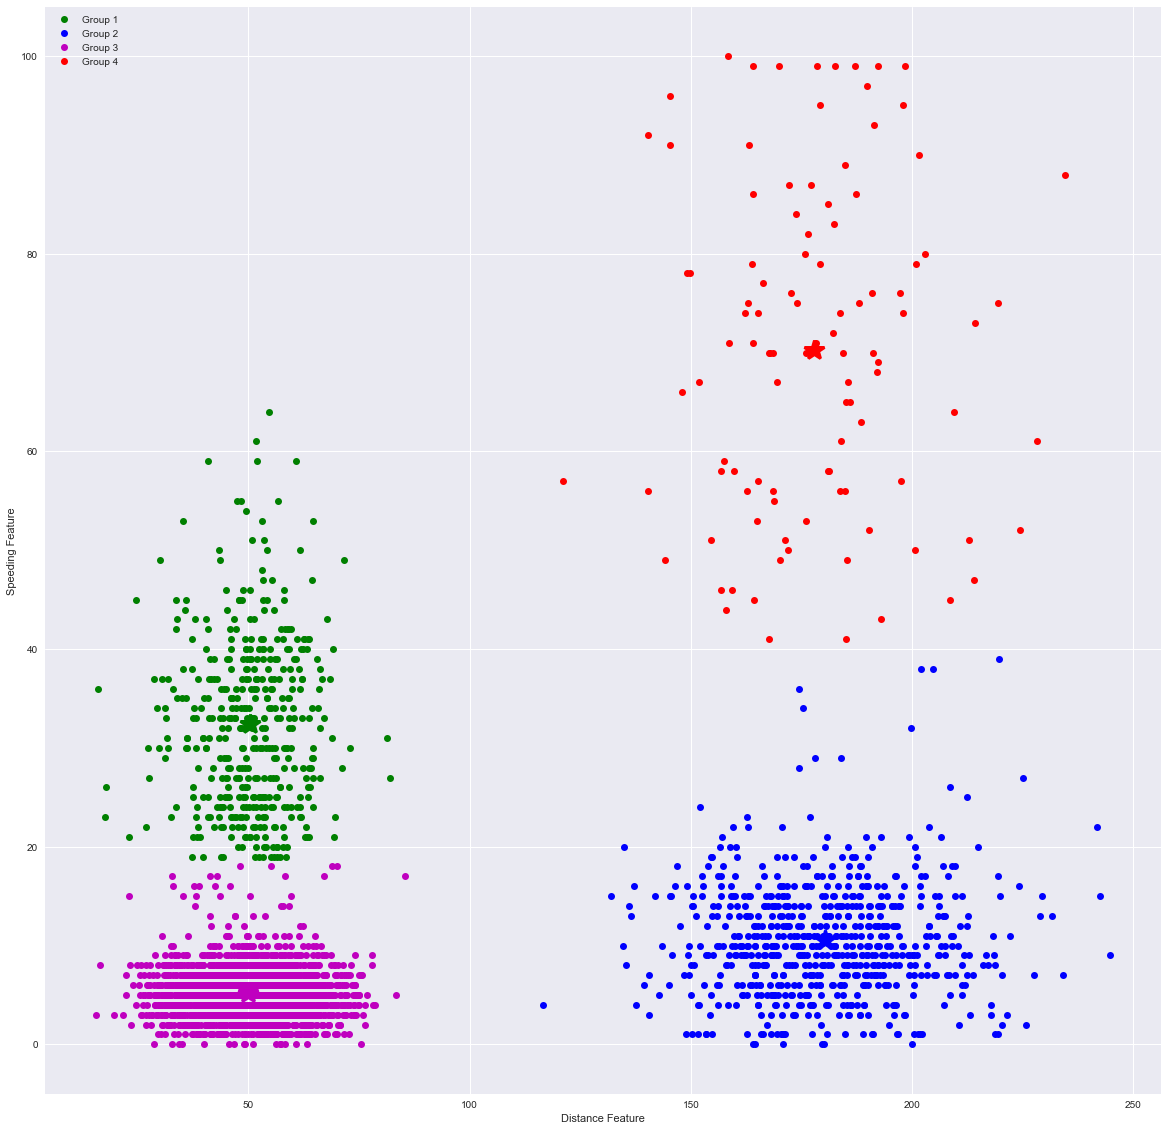

In [28]:
# Plot the results
plt.figure(figsize=(20,20))
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')

plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'m*',markersize=20,mew=3)
h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'ro')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')
plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

In [29]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [30]:
df_labels = pd.DataFrame(kmeans.labels_,columns=["labels"])

In [31]:
df['labels'] = df_labels['labels']

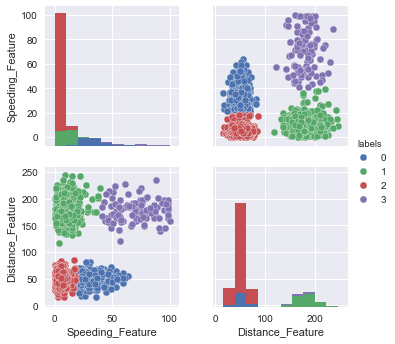

In [32]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df, vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

In [33]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [35]:
type(hdf)

h2o.frame.H2OFrame

In [34]:
hdf 

Distance_Feature,Speeding_Feature
71.24,28
52.53,25
64.54,27
55.69,22
54.58,25
41.91,10
58.64,20
52.02,8
31.25,34
44.31,19


In [36]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [52]:
estimator = H2OKMeansEstimator(k=4, init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [ ]:
estimator = H2OKMeansEstimator(k=4,  init="Random", seed=2, standardize=True)
estimator.train(x=hdf.col_names, training_frame = hdf)

In [53]:
print(estimator.predict_leaf_node_assignment)

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1509724873145_27760


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 5089.58346995
Total Sum of Square Error to Grand Mean: 11262.0000009
Between Cluster Sum of Square Error: 6172.41653099
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,1026.0,1464.9066739
,2.0,799.0,2600.8922085
,3.0,1142.0,442.4103363
,4.0,1033.0,581.3742513


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2017-11-03 13:32:04,0.017 sec,0.0,nan,nan
,2017-11-03 13:32:04,0.023 sec,1.0,4000.0,8699.8730229
,2017-11-03 13:32:04,0.027 sec,2.0,1059.0,6770.2657356
,2017-11-03 13:32:04,0.030 sec,3.0,315.0,6536.4790112
,2017-11-03 13:32:04,0.033 sec,4.0,494.0,6051.3535316
,2017-11-03 13:32:04,0.036 sec,5.0,464.0,5695.5377737
,2017-11-03 13:32:04,0.038 sec,6.0,126.0,5124.6544099
,2017-11-03 13:32:04,0.042 sec,7.0,10.0,5089.5985257
,2017-11-03 13:32:04,0.044 sec,8.0,0.0,5089.5834655


<bound method H2OKMeansEstimator.predict_leaf_node_assignment of >


In [54]:
predicted = estimator.predict(hdf)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [55]:
predicted['predict'].unique()

C1
0
2
1
3


In [56]:
predicted.head()

predict
0
0
0
0
0
3
0
0
0
0


In [57]:
predicted.tail()

predict
1
1
1
1
1
1
1
1
1
1


In [58]:
hdf["labels"] = predicted["predict"].asfactor()

In [59]:
hdf.head(5)

Distance_Feature,Speeding_Feature,labels
71.24,28,0
52.53,25,0
64.54,27,0
55.69,22,0
54.58,25,0


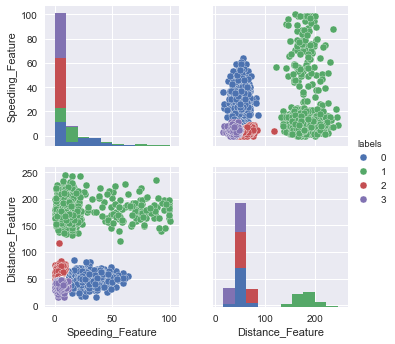

In [60]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(hdf.as_data_frame(), vars=["Speeding_Feature" , "Distance_Feature"], hue="labels");
plt.show()

In [61]:
px = predicted.as_data_frame()

In [62]:
px_list = px['predict'].values.tolist()

In [63]:
px_array = np.array(px_list, dtype=np.int32)

In [64]:
px_array

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [65]:
# Plot the results
def plot_kmeans_labels(labels):
    plt.figure(figsize=(20,10))
    h1,=plt.plot(f1[labels==0],f2[labels==0],'go')

    plt.plot(np.mean(f1[labels==0]),np.mean(f2[labels==0]),'g*',markersize=20,mew=3)
    h2,=plt.plot(f1[labels==1],f2[labels==1],'bo')
    plt.plot(np.mean(f1[labels==1]),np.mean(f2[labels==1]),'b*',markersize=20,mew=3)
    h3,=plt.plot(f1[labels==2],f2[labels==2],'mo')
    plt.plot(np.mean(f1[labels==2]),np.mean(f2[labels==2]),'m*',markersize=20,mew=3)
    h4,=plt.plot(f1[labels==3],f2[labels==3],'ro')
    plt.plot(np.mean(f1[labels==3]),np.mean(f2[labels==3]),'r*',markersize=20,mew=3)
    plt.ylabel('Speeding Feature')
    plt.xlabel('Distance Feature')
    plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
    plt.show()

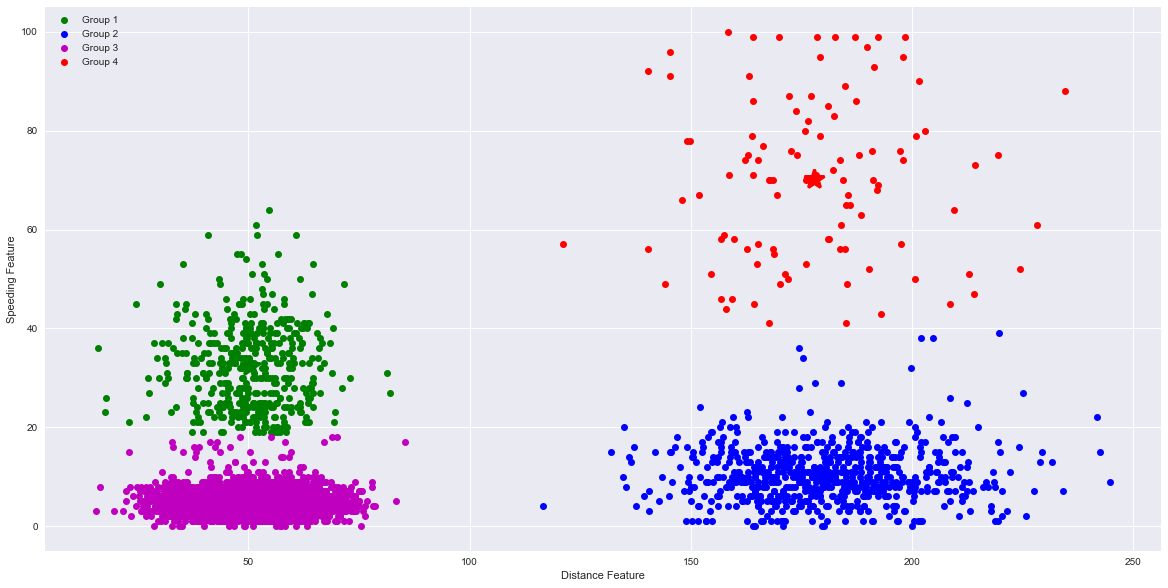

In [66]:
plot_kmeans_labels(kmeans.labels_)

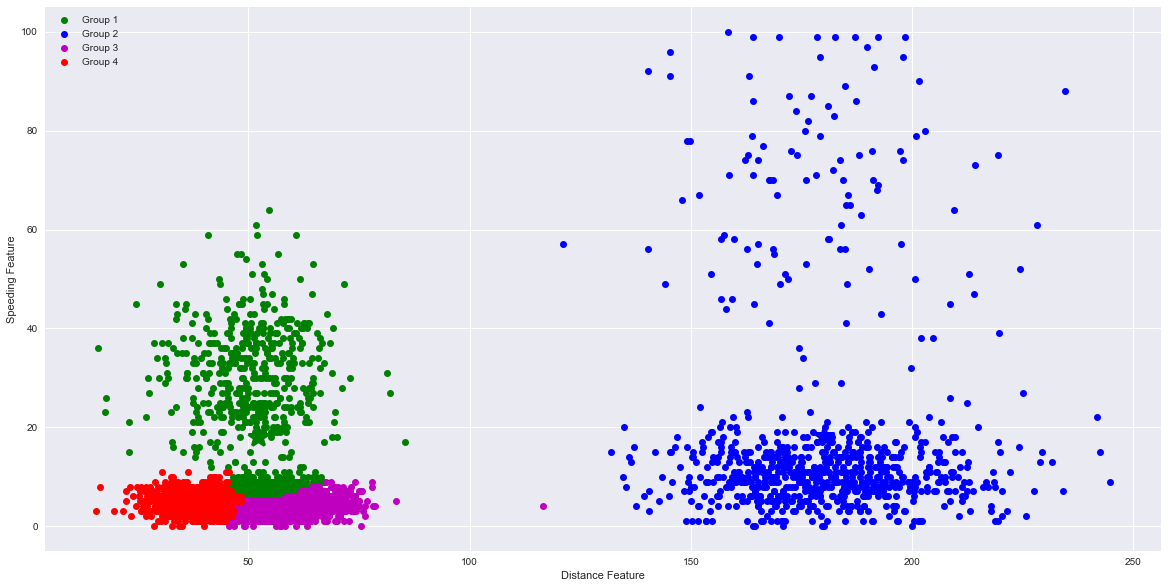

In [67]:
plot_kmeans_labels(px_array)